In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("full_dataset.csv")

In [3]:
# Inspect the dataset

df.head()

,y_,ID,engine_age,length,power,month,landing,weight,value,value_cpi,...,year,patch,dist,patch_area,weight_lym,weight_lm,val_lm,val_lym,nao_index,surf_temp
0,1.0,1993001257,10.0,10.50,367.0,44,RISØR,5.0,95.70,119.62,...,3.0,09-16,13.6,3229,0.000000,1.000000,1.000000,0.0,-0.070,286.90
1,1.0,1993005128,26.0,21.30,970.0,131,BÅTSFJORD,19.0,564.59,611.69,...,10.0,03-03,59.6,2122,0.000000,0.371367,0.359628,0.0,-1.616,276.25
2,0.0,1996007882,32.0,12.13,190.0,170,ØKSNES,0.0,0.00,0.00,...,14.0,04-27,286.7,4596,0.000000,0.000000,0.000000,0.0,1.335,279.03
3,0.0,1999009281,8.0,27.45,1014.0,89,AVERØY,0.0,0.00,0.00,...,7.0,42-72,461.5,3038,0.000000,0.000000,0.000000,0.0,0.664,282.22
4,1.0,1986007228,31.0,9.22,80.0,216,BRØNNØY,12.5,816.34,769.41,...,18.0,06-23,40.2,2555,0.820069,0.000000,0.000000,0.0,0.882,284.25


In [4]:
pd.options.display.max_columns = 25

In [5]:
df.columns

Index(['y_', 'ID', 'engine_age', 'length', 'power', 'month', 'landing',
       'weight', 'value', 'value_cpi', 'price', 'y_month', 'year', 'patch',
       'dist', 'patch_area', 'weight_lym', 'weight_lm', 'val_lm', 'val_lym',
       'nao_index', 'surf_temp'],
      dtype='object')

# Do a PCA and Cluster the data

In [6]:
# Check for NaN values and remove them 
df.isna().sum()
df.dropna(inplace = True)

In [7]:
# drop unnecessary rows (where fishing did not take place)
df = df[df.y_ != 0.0]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736761 entries, 0 to 1601869
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   y_          736761 non-null  float64
 1   ID          736761 non-null  int64  
 2   engine_age  736761 non-null  float64
 3   length      736761 non-null  float64
 4   power       736761 non-null  float64
 5   month       736761 non-null  int64  
 6   landing     736761 non-null  object 
 7   weight      736761 non-null  float64
 8   value       736761 non-null  float64
 9   value_cpi   736761 non-null  float64
 10  price       736761 non-null  float64
 11  y_month     736761 non-null  int64  
 12  year        736761 non-null  float64
 13  patch       736761 non-null  object 
 14  dist        736761 non-null  float64
 15  patch_area  736761 non-null  int64  
 16  weight_lym  736761 non-null  float64
 17  weight_lm   736761 non-null  float64
 18  val_lm      736761 non-null  float64
 19  v

In [9]:
# Select my numerical columns for  pca and clustering

X = df.select_dtypes('number')
X.head()

,y_,ID,engine_age,length,power,month,weight,value,value_cpi,price,y_month,year,dist,patch_area,weight_lym,weight_lm,val_lm,val_lym,nao_index,surf_temp
0,1.0,1993001257,10.0,10.50,367.0,44,5.0,95.70,119.62,19.140000,8,3.0,13.6,3229,0.000000,1.000000,1.000000,0.0,-0.070,286.90
1,1.0,1993005128,26.0,21.30,970.0,131,19.0,564.59,611.69,29.715263,11,10.0,59.6,2122,0.000000,0.371367,0.359628,0.0,-1.616,276.25
4,1.0,1986007228,31.0,9.22,80.0,216,12.5,816.34,769.41,65.307200,0,18.0,40.2,2555,0.820069,0.000000,0.000000,0.0,0.882,284.25
6,1.0,1992007706,15.0,10.10,210.0,87,2.0,16.84,19.93,8.420000,3,7.0,23.9,2221,0.000000,0.000000,0.000000,0.0,1.442,279.48
7,1.0,1981008799,29.0,9.10,62.0,47,7.0,75.08,93.27,10.725714,11,3.0,30.2,3292,0.000000,0.000000,0.000000,0.0,0.860,283.05


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

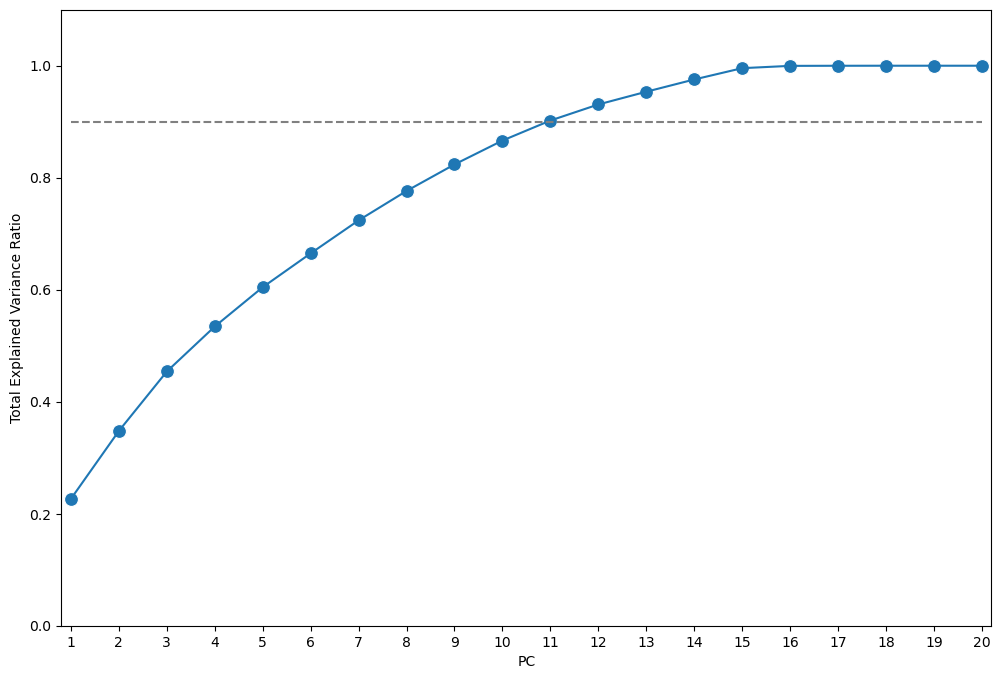

In [11]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.show()

In [19]:
scaler =StandardScaler()
decomp = PCA(n_components = 0.9) # here we set the selection criteria
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

pipe['pca'].explained_variance_ratio_.cumsum()

array([0.22672347, 0.34796882, 0.4540515 , 0.53438122, 0.60454078,
       0.66494451, 0.72387925, 0.77638573, 0.82372126, 0.86633212,
       0.90212597])

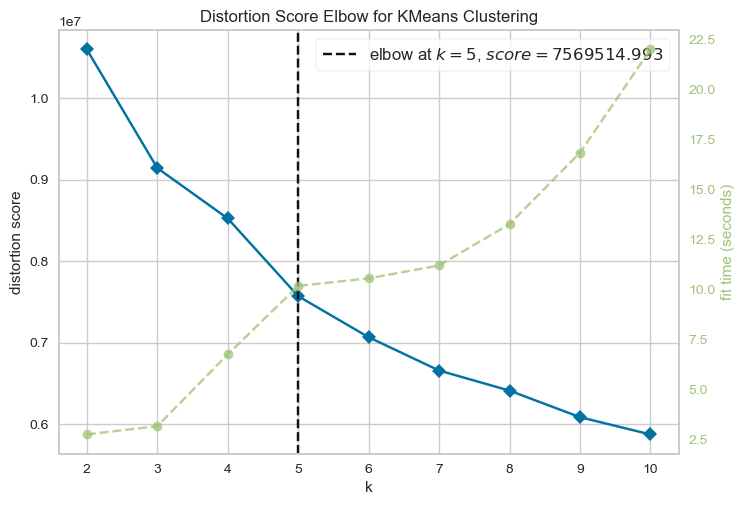

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
scaler = StandardScaler()
decomp = PCA(n_components = 0.9)
cluster = KElbowVisualizer(KMeans())
pipe = make_pipeline(scaler,decomp,cluster)

pipe.fit(X)
pipe[2].show()



In [14]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans(n_clusters=5)
pipe = make_pipeline(scaler, decomp,cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=5))])

In [15]:
values = pipe[:2].transform(X)
# len(values)

pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df = df.join(pd.DataFrame(values, columns=pca_labels))

df['clusters'] = pipe['kmeans'].labels_

df

,y_,ID,engine_age,length,power,month,landing,weight,value,value_cpi,price,y_month,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,clusters
0,1.0,1993001257,10.0,10.50,367.0,44,RISØR,5.0,95.70,119.62,19.140000,8,...,-0.572710,1.588118,1.704765,-2.061412,0.009591,1.019851,-0.390196,-0.884768,0.957755,0.071160,0.300472,0
1,1.0,1993005128,26.0,21.30,970.0,131,BÅTSFJORD,19.0,564.59,611.69,29.715263,11,...,0.474178,0.640195,-0.668251,-0.645569,0.723204,0.678122,0.858205,0.888079,-2.033062,0.151785,-1.317468,1
4,1.0,1986007228,31.0,9.22,80.0,216,BRØNNØY,12.5,816.34,769.41,65.307200,0,...,0.014188,2.791184,0.135669,0.093032,1.135022,0.210491,-0.193798,-0.031768,1.259658,0.078164,-1.408814,3
6,1.0,1992007706,15.0,10.10,210.0,87,HASVIK,2.0,16.84,19.93,8.420000,3,...,-0.016323,1.520625,-0.889825,1.484784,-0.582038,0.339615,-0.436430,1.023878,0.950868,0.571925,0.369963,1
7,1.0,1981008799,29.0,9.10,62.0,47,EIGERSUND,7.0,75.08,93.27,10.725714,11,...,0.683000,0.613354,-1.888756,-0.436994,-1.609439,-0.189325,-1.023847,0.127479,-0.012704,0.640909,-0.166909,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601859,1.0,2012059452,26.0,8.50,85.0,171,MOSKENES,689.0,5118.41,5260.44,7.428752,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1601862,1.0,1998001251,6.0,7.00,30.0,57,KRISTIANSAND,88.0,4201.63,5168.06,47.745795,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1601863,1.0,1980011071,28.0,15.48,370.0,100,HASVIK,1659.0,32864.79,37688.98,19.810000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1601867,1.0,2007039109,3.0,7.00,144.0,124,BØMLO,1.5,19.17,20.68,12.780000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


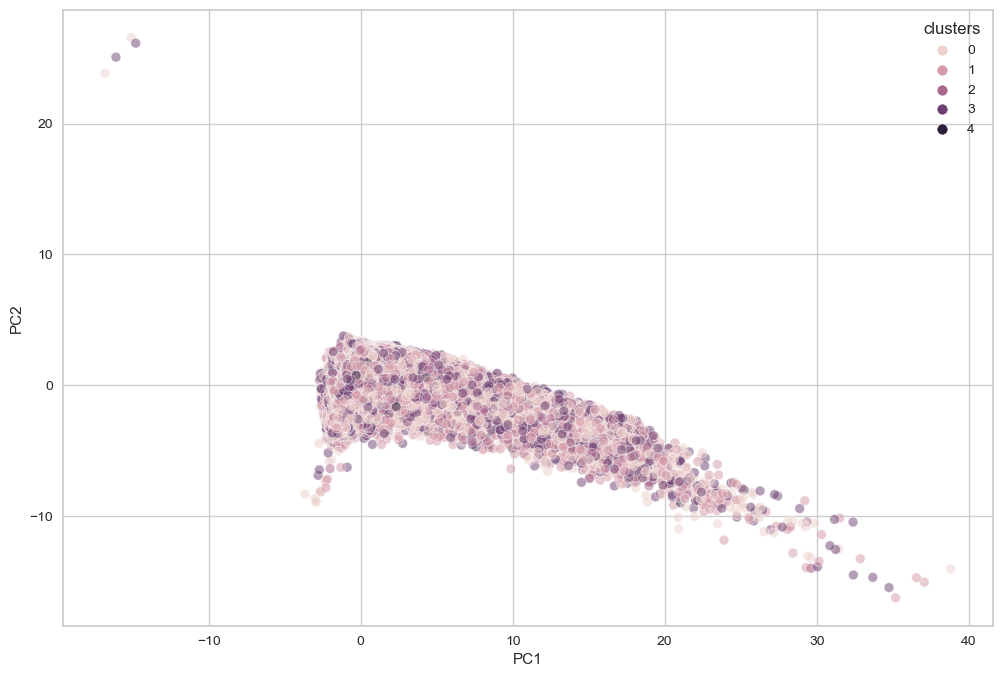

In [16]:
# let's look at PC1 and PC2 and how our clusters look like in that context
plt.figure(figsize = (12,8))
g = sns.scatterplot(data=df, x='PC1', y='PC2', hue='clusters', alpha=0.5)

In [20]:
# Set my scaler - I'll start with standard
scaler = StandardScaler()

In [21]:
# chart recommends 4 clusters so we'll plot those out 

pipe = make_pipeline(StandardScaler(),KMeans(n_clusters=4))
pipe.fit(X)
df['clusters'] = pipe['kmeans'].labels_

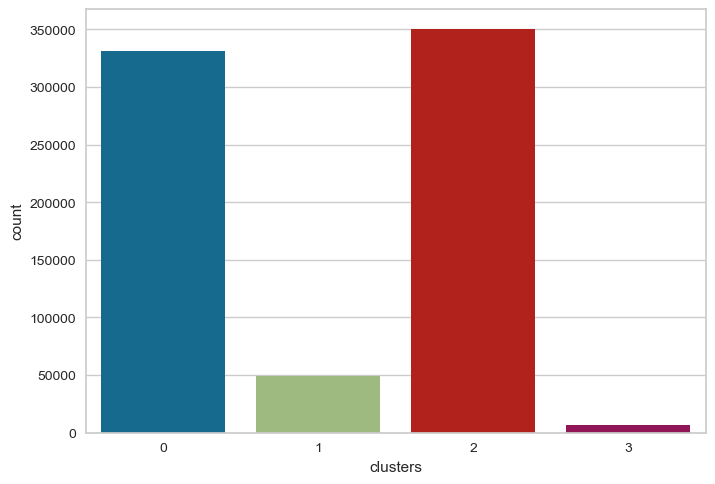

In [22]:
sns.countplot(data = df, x = 'clusters')
plt.show()

In [23]:
X.columns

Index(['y_', 'ID', 'engine_age', 'length', 'power', 'month', 'weight', 'value',
       'value_cpi', 'price', 'y_month', 'year', 'dist', 'patch_area',
       'weight_lym', 'weight_lm', 'val_lm', 'val_lym', 'nao_index',
       'surf_temp'],
      dtype='object')

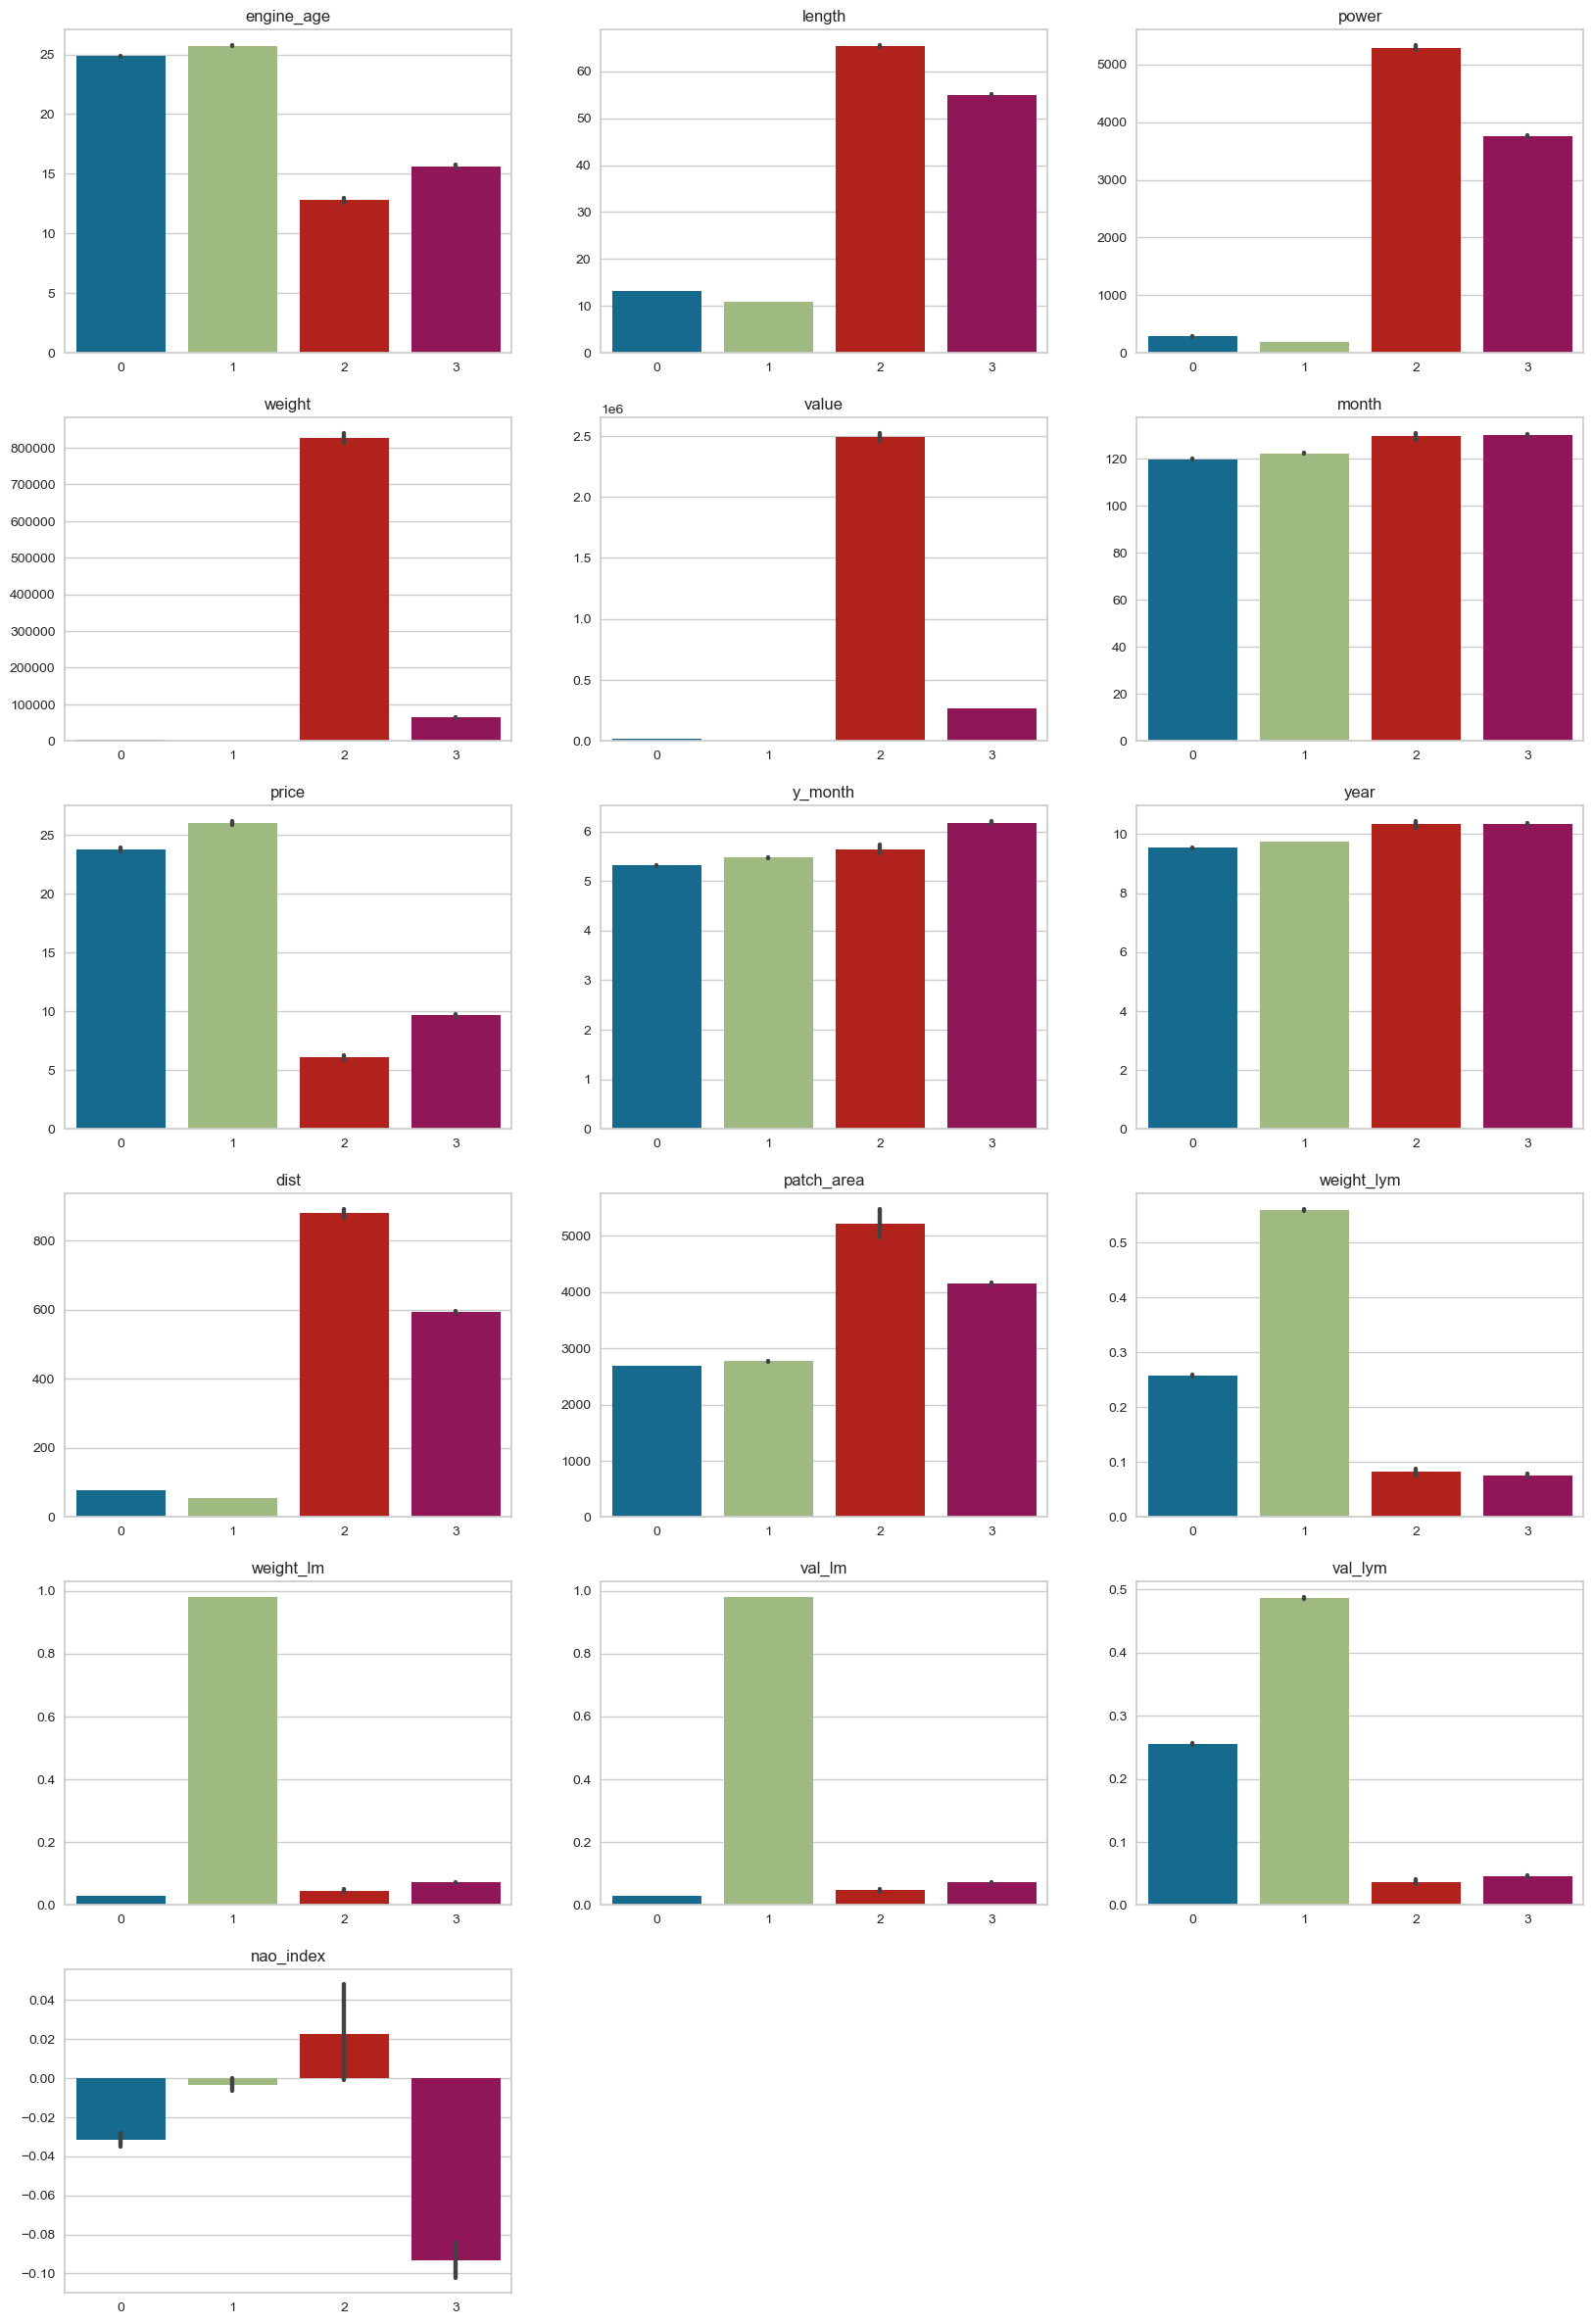

In [24]:
# Now I'll plot out the clusters against some of the df columns that I think will be interesting

import math
pipe = make_pipeline(StandardScaler(),KMeans(n_clusters=4))
pipe.fit(X)
df['clusters'] = pipe['kmeans'].labels_

var_list = '''
    engine_age
    length
    power
    weight
    value
    month
    price
    y_month
    year
    dist
    patch_area
    weight_lym
    weight_lm
    val_lm
    val_lym
    nao_index
    '''.split()

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20, 5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df, x='clusters', y=i, ax=ax)
    ax.set(xlabel='', ylabel='', title=i)

for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

plt.show()

In [25]:
df.head()

,y_,ID,engine_age,length,power,month,landing,weight,value,value_cpi,price,y_month,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,clusters
0,1.0,1993001257,10.0,10.50,367.0,44,RISØR,5.0,95.70,119.62,19.140000,8,...,-0.572710,1.588118,1.704765,-2.061412,0.009591,1.019851,-0.390196,-0.884768,0.957755,0.071160,0.300472,1
1,1.0,1993005128,26.0,21.30,970.0,131,BÅTSFJORD,19.0,564.59,611.69,29.715263,11,...,0.474178,0.640195,-0.668251,-0.645569,0.723204,0.678122,0.858205,0.888079,-2.033062,0.151785,-1.317468,0
4,1.0,1986007228,31.0,9.22,80.0,216,BRØNNØY,12.5,816.34,769.41,65.307200,0,...,0.014188,2.791184,0.135669,0.093032,1.135022,0.210491,-0.193798,-0.031768,1.259658,0.078164,-1.408814,0
6,1.0,1992007706,15.0,10.10,210.0,87,HASVIK,2.0,16.84,19.93,8.420000,3,...,-0.016323,1.520625,-0.889825,1.484784,-0.582038,0.339615,-0.436430,1.023878,0.950868,0.571925,0.369963,0
7,1.0,1981008799,29.0,9.10,62.0,47,EIGERSUND,7.0,75.08,93.27,10.725714,11,...,0.683000,0.613354,-1.888756,-0.436994,-1.609439,-0.189325,-1.023847,0.127479,-0.012704,0.640909,-0.166909,0


In [26]:
# I'll save my new df so I have my cluster labels!

df.to_csv("fishing.csv", index=False)

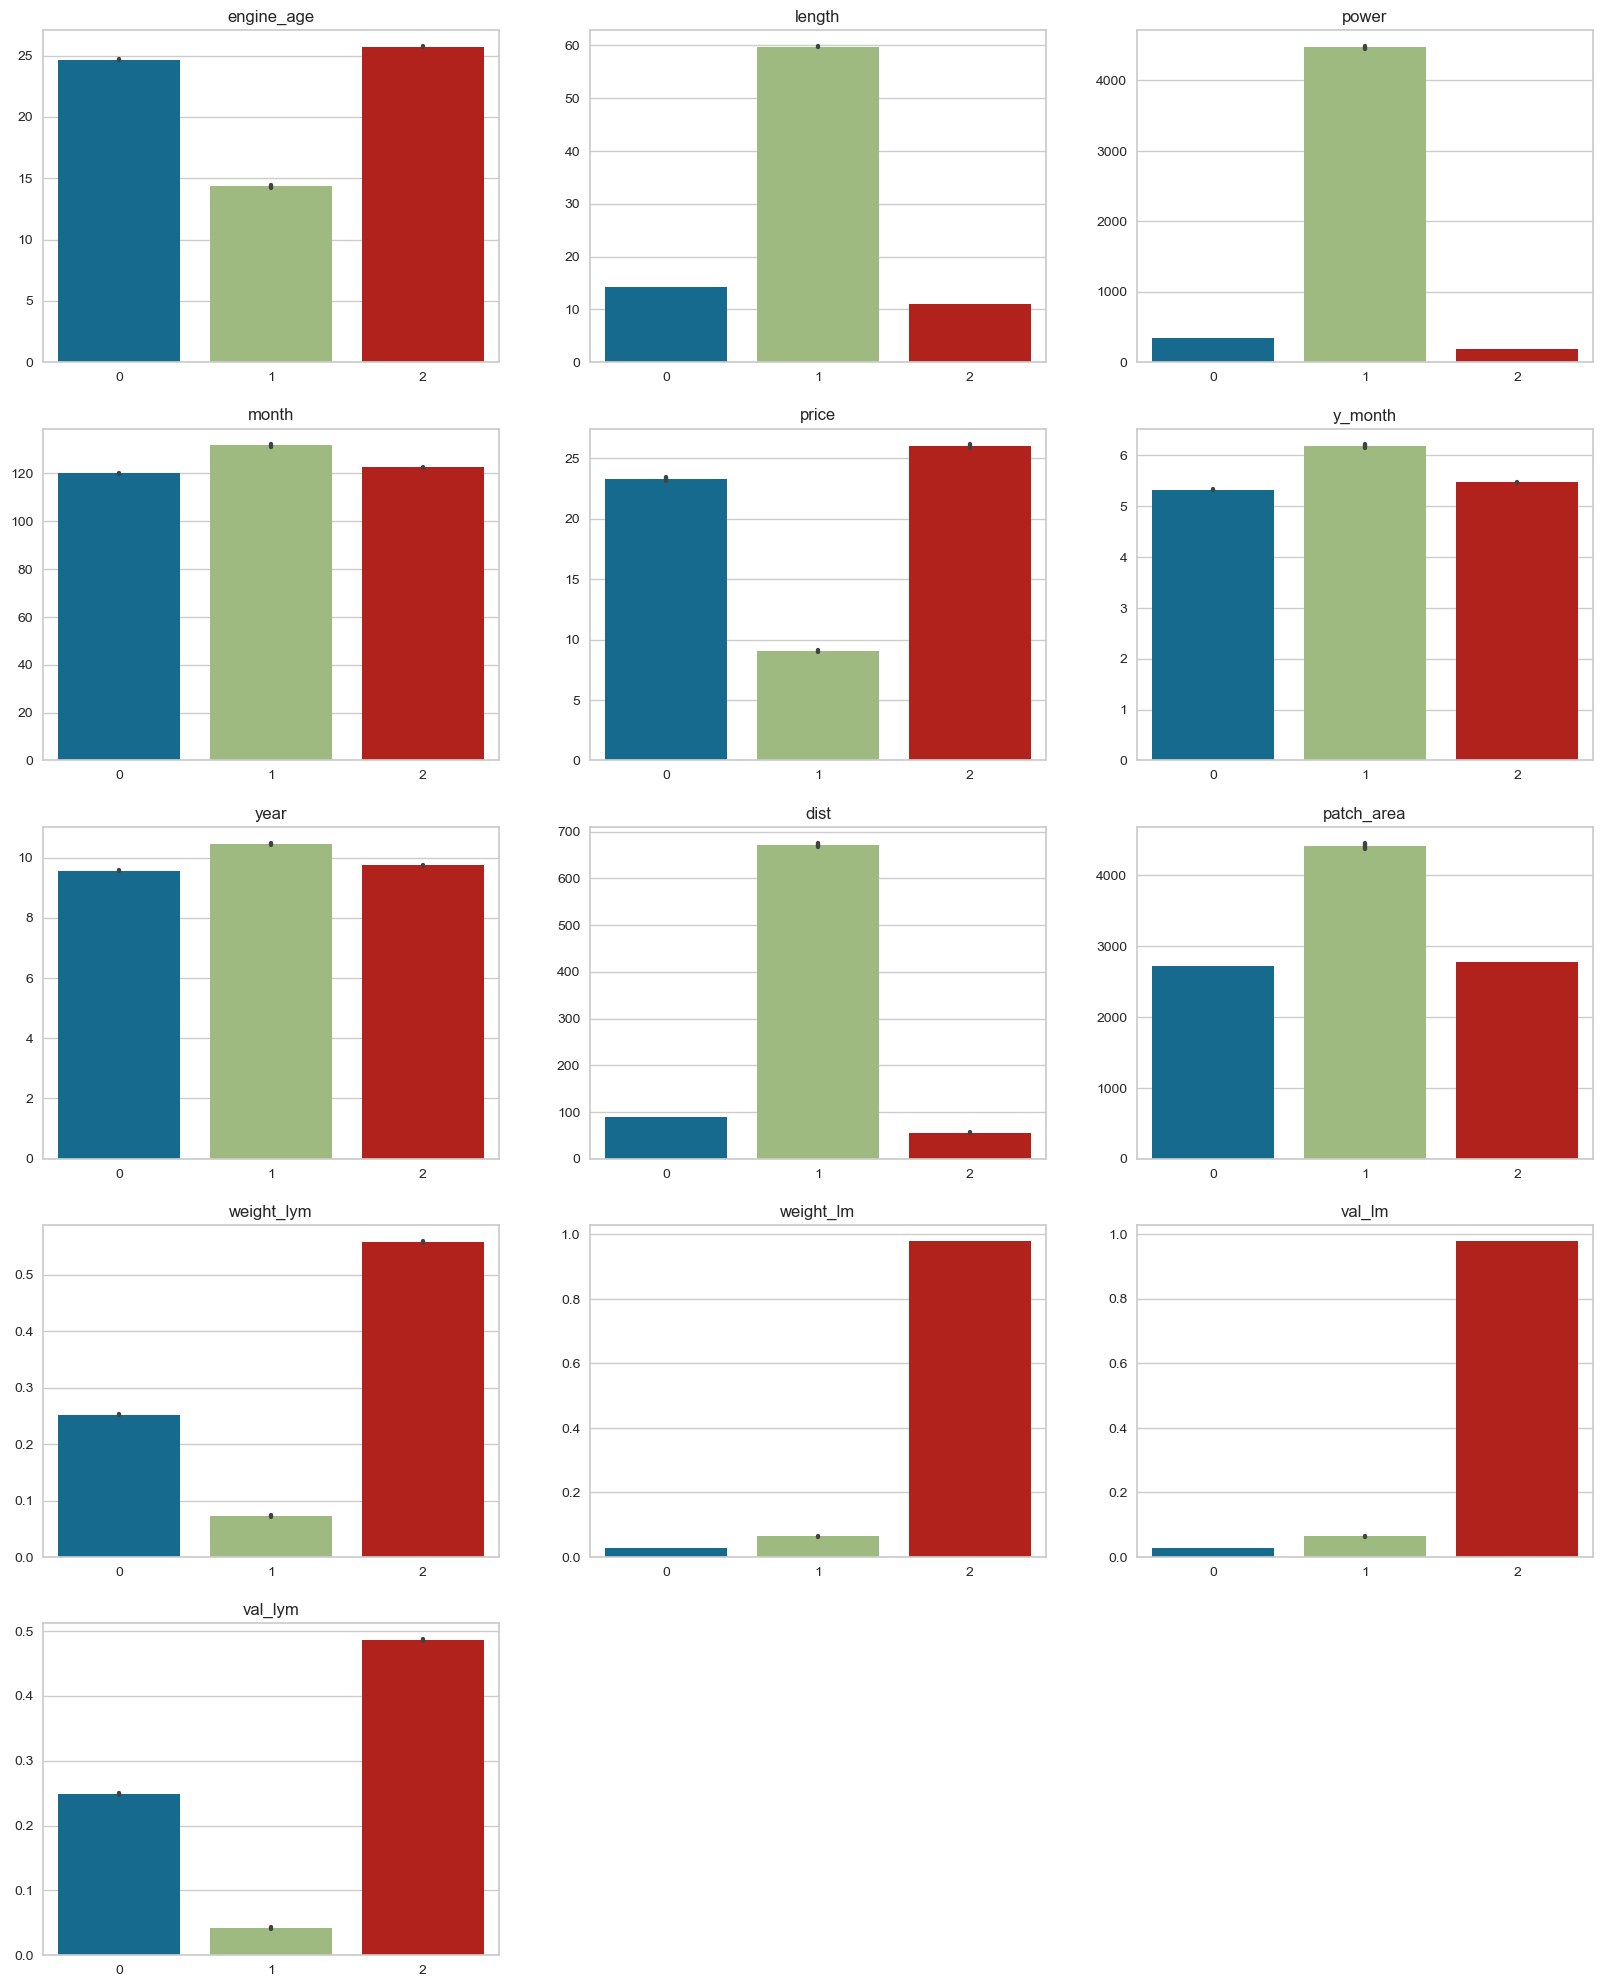

In [23]:
# I'll test out three clusters also, just for comparison
# But I like the four clusters better, since it shows more clear lines of difference

import math
pipe = make_pipeline(StandardScaler(),KMeans(n_clusters=3))
pipe.fit(X)
df['clusters'] = pipe['kmeans'].labels_

var_list = '''
    engine_age
    length
    power
    month
    price
    y_month
    year
    dist
    patch_area
    weight_lym
    weight_lm
    val_lm
    val_lym
    '''.split()

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20, 5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df, x='clusters', y=i, ax=ax)
    ax.set(xlabel='', ylabel='', title=i)

for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

plt.show()